# 시계열 분석

* 통계분석을 실행하는 것이 아니므로 별도로 차분 등의 중간과정 생략
* 보다 깔끔한 결과를 위해서는 주기를 맞추는게 좋긴 할거임
* 그러나 큰 차이가 없다면 그대로 진행해도 괜찮음

## 데이터 불러오기

In [1]:
# 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as tsa
import plotly.graph_objs as go
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/data_cat_all.xlsx'
df = pd.read_excel(excelFile)
df.head()

,period,디지털/가전,패션의류,가구/인테리어,도서,생활/건강,스포츠/레저,식품,출산/육아,패션잡화,화장품/미용
0,2021-05-10,12.18344,9.68679,5.44947,0.04328,13.94238,7.33006,6.43235,5.15469,10.05799,3.29609
1,2021-05-11,11.39762,9.55987,4.97732,0.10491,13.29577,6.87210,6.27344,4.86485,9.78046,3.15404
2,2021-05-12,11.31013,9.80653,4.82853,0.11601,12.95931,6.64342,5.94068,4.88141,9.74198,3.03323
3,2021-05-13,11.18911,9.89209,4.56359,0.10808,12.32444,6.36751,5.60075,4.93127,9.43991,2.88430
4,2021-05-14,10.88907,9.44241,4.24099,0.09742,11.44237,5.80616,5.05788,4.62662,8.98145,2.70522


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   period   785 non-null    object 
 1   디지털/가전   785 non-null    float64
 2   패션의류     785 non-null    float64
 3   가구/인테리어  785 non-null    float64
 4   도서       785 non-null    float64
 5   생활/건강    785 non-null    float64
 6   스포츠/레저   785 non-null    float64
 7   식품       785 non-null    float64
 8   출산/육아    785 non-null    float64
 9   패션잡화     785 non-null    float64
 10  화장품/미용   785 non-null    float64
dtypes: float64(10), object(1)
memory usage: 67.6+ KB


In [4]:
# period컬럼의 데이터타입 변경
df['period'] = pd.to_datetime(df['period'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   period   785 non-null    datetime64[ns]
 1   디지털/가전   785 non-null    float64       
 2   패션의류     785 non-null    float64       
 3   가구/인테리어  785 non-null    float64       
 4   도서       785 non-null    float64       
 5   생활/건강    785 non-null    float64       
 6   스포츠/레저   785 non-null    float64       
 7   식품       785 non-null    float64       
 8   출산/육아    785 non-null    float64       
 9   패션잡화     785 non-null    float64       
 10  화장품/미용   785 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 67.6 KB


## 시계열 그래프 확인

<Axes: xlabel='period'>

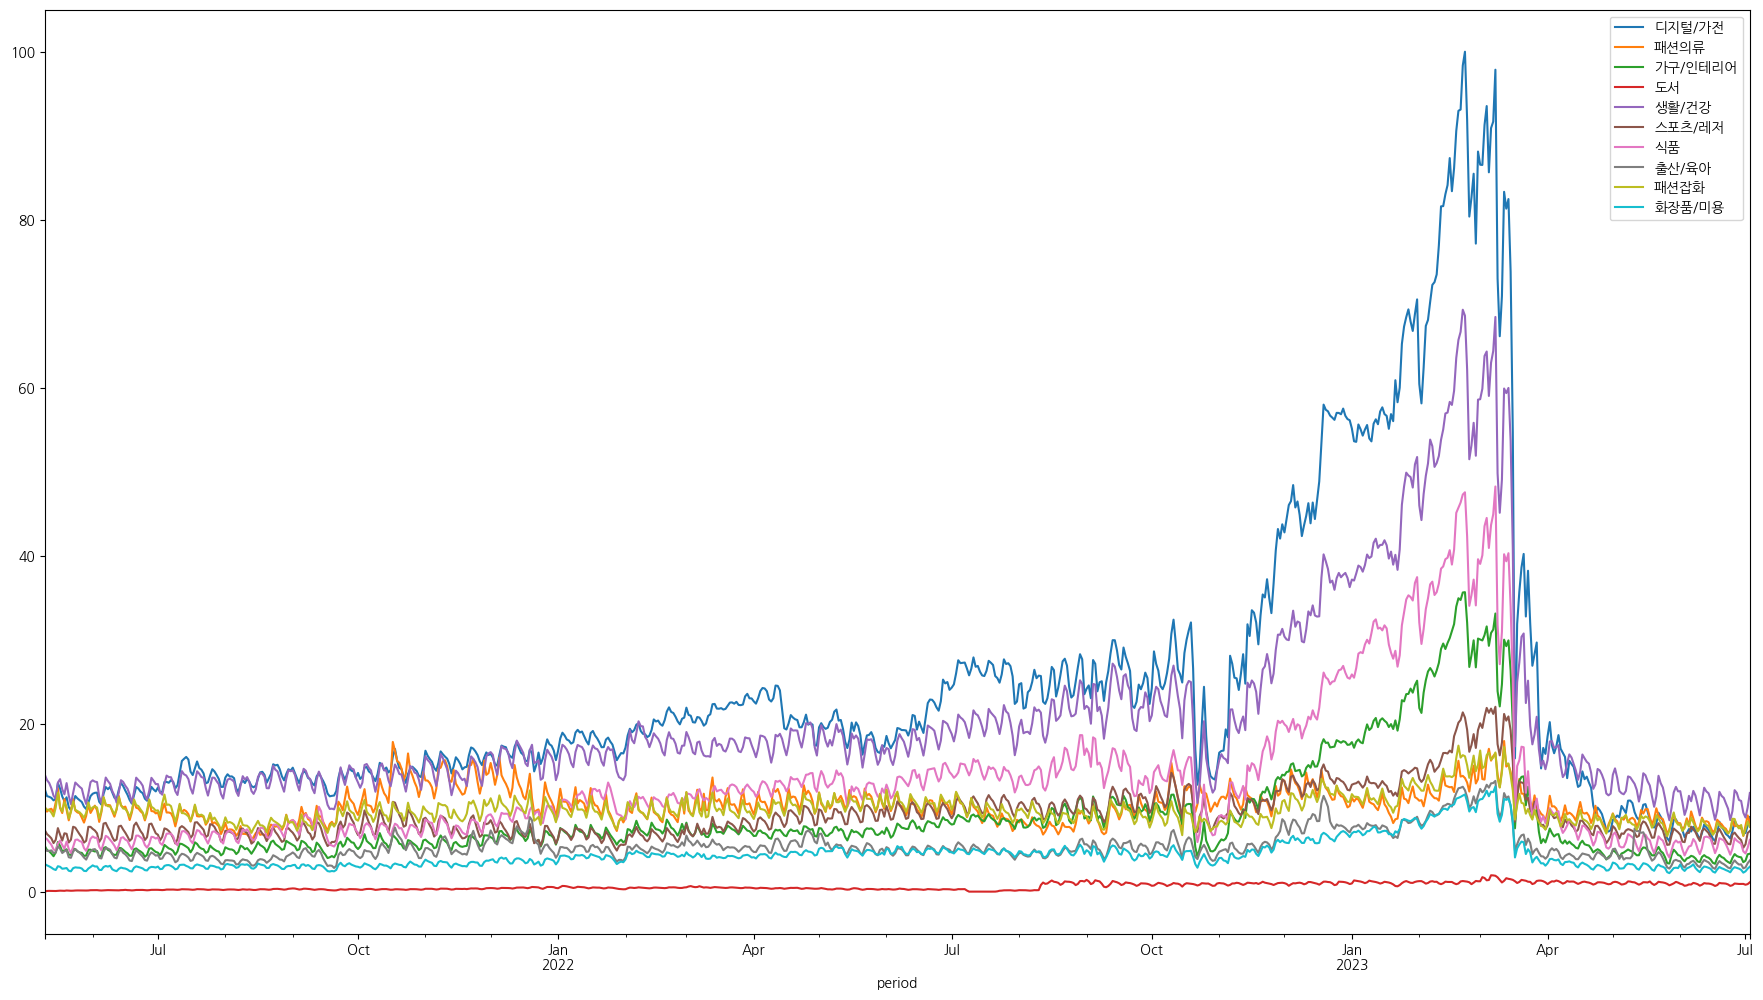

In [5]:
# 시계열 그래프
df.plot(x = 'period', figsize = (22, 12))

* 급격하게 증가된 디지털/가전과 생활/건강만을 별도로 분리해 시계열 분석 진행

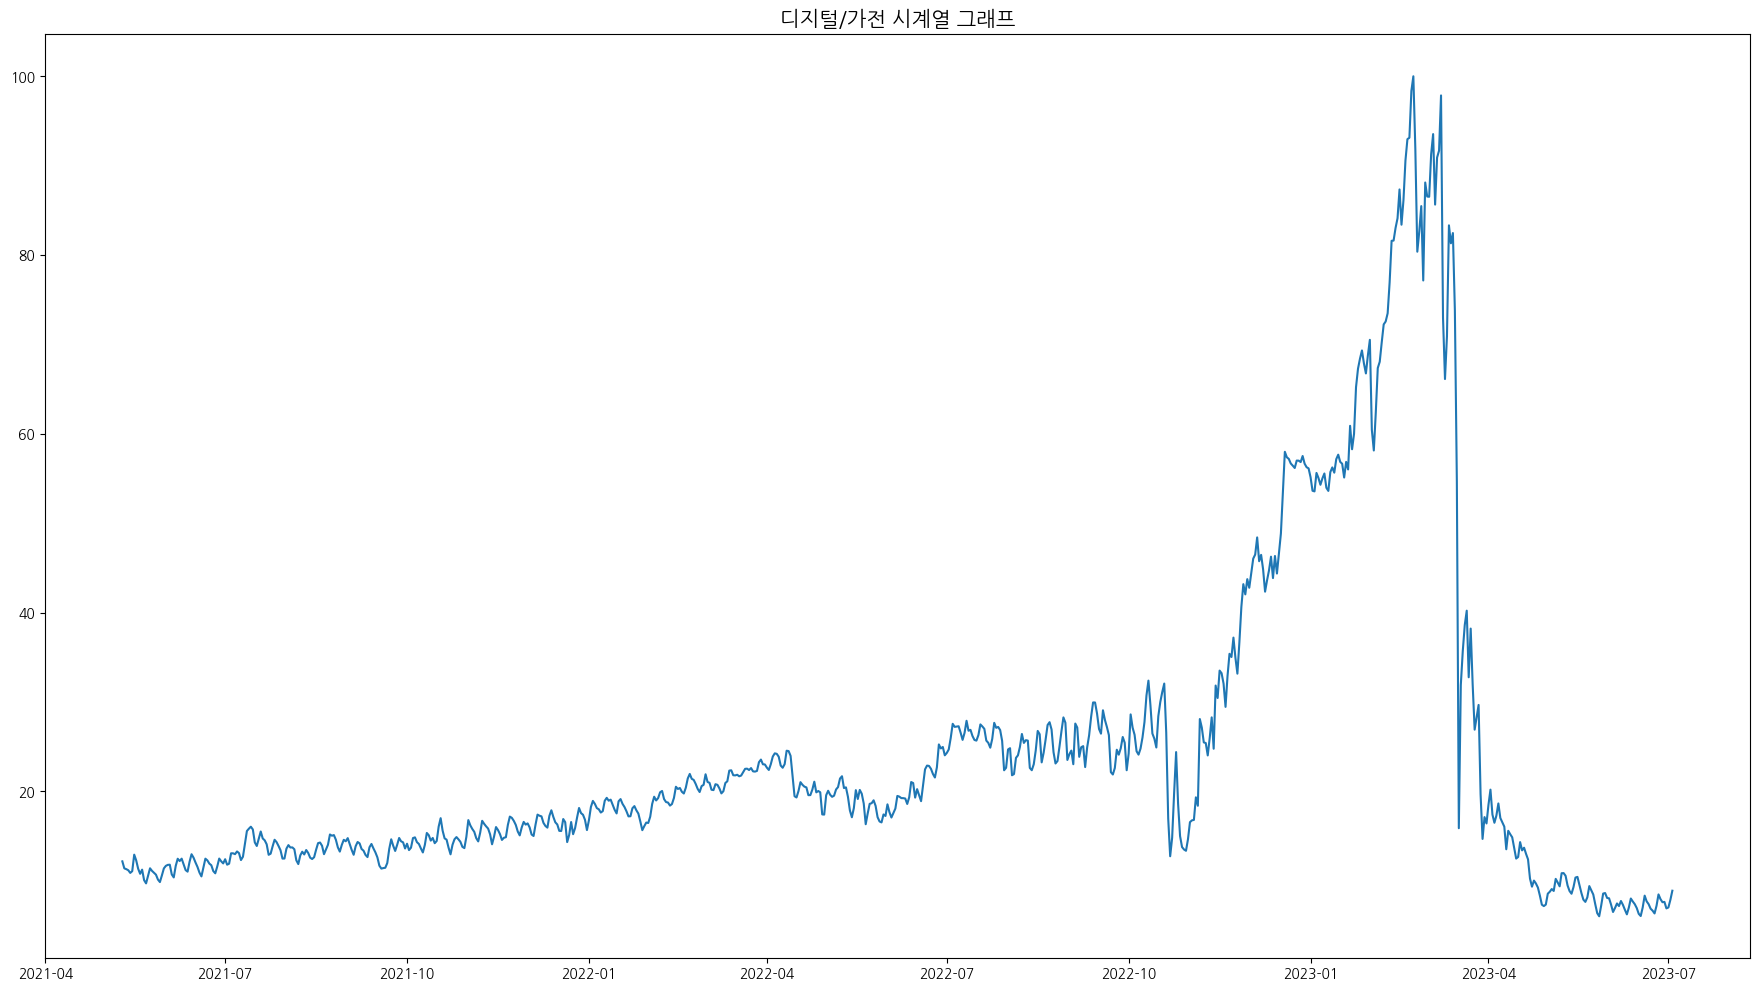

In [6]:
# 디지털/가전 항목의 시계열 그래프
plt.figure(figsize = (22, 12))
plt.plot('period','디지털/가전', data = df)
plt.title('디지털/가전 시계열 그래프', fontsize = 15)
plt.show()

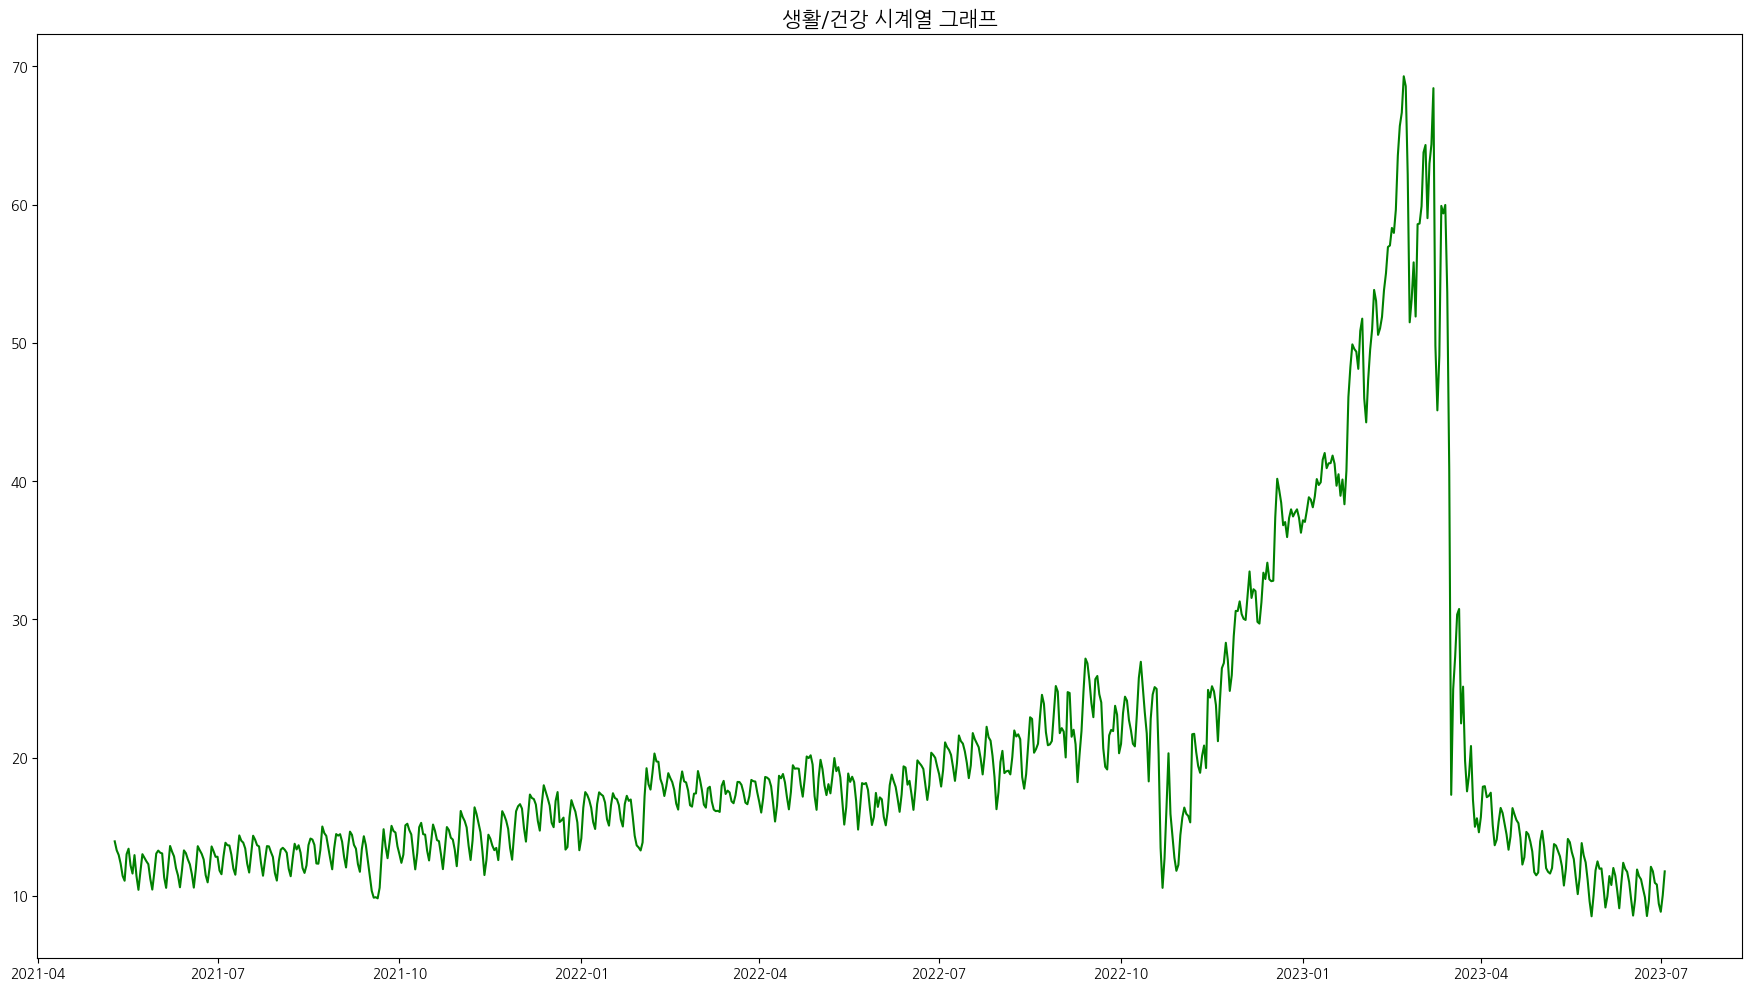

In [7]:
# 생활/건강 항목의 시계열 그래프
plt.figure(figsize = (22, 12))
plt.plot('period','생활/건강', data = df, color = 'green')
plt.title('생활/건강 시계열 그래프', fontsize = 15)
plt.show()

## 분해법

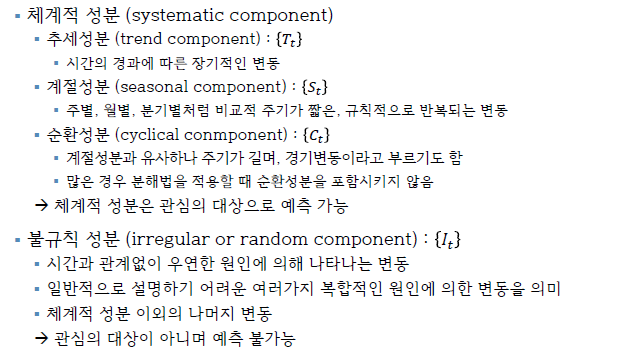

In [8]:
# 디지털/가전 항목의 시계열 데이터 프레임 생성
# ts_df1 = pd.pivot_table(data = df, index = 'period', values = '디지털/가전').reset_index()
# ts_df1.set_index('period')
timeSeries1 = df.loc[:, ['period', '디지털/가전']]
timeSeries1.index = timeSeries1.period
ts1 = timeSeries1.drop('period', axis = 1)

In [9]:
ts1

,디지털/가전
period,
2021-05-10,12.18344
2021-05-11,11.39762
2021-05-12,11.31013
2021-05-13,11.18911
2021-05-14,10.88907
...,...
2023-06-29,7.64771
2023-06-30,6.91899
2023-07-01,7.02520


D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


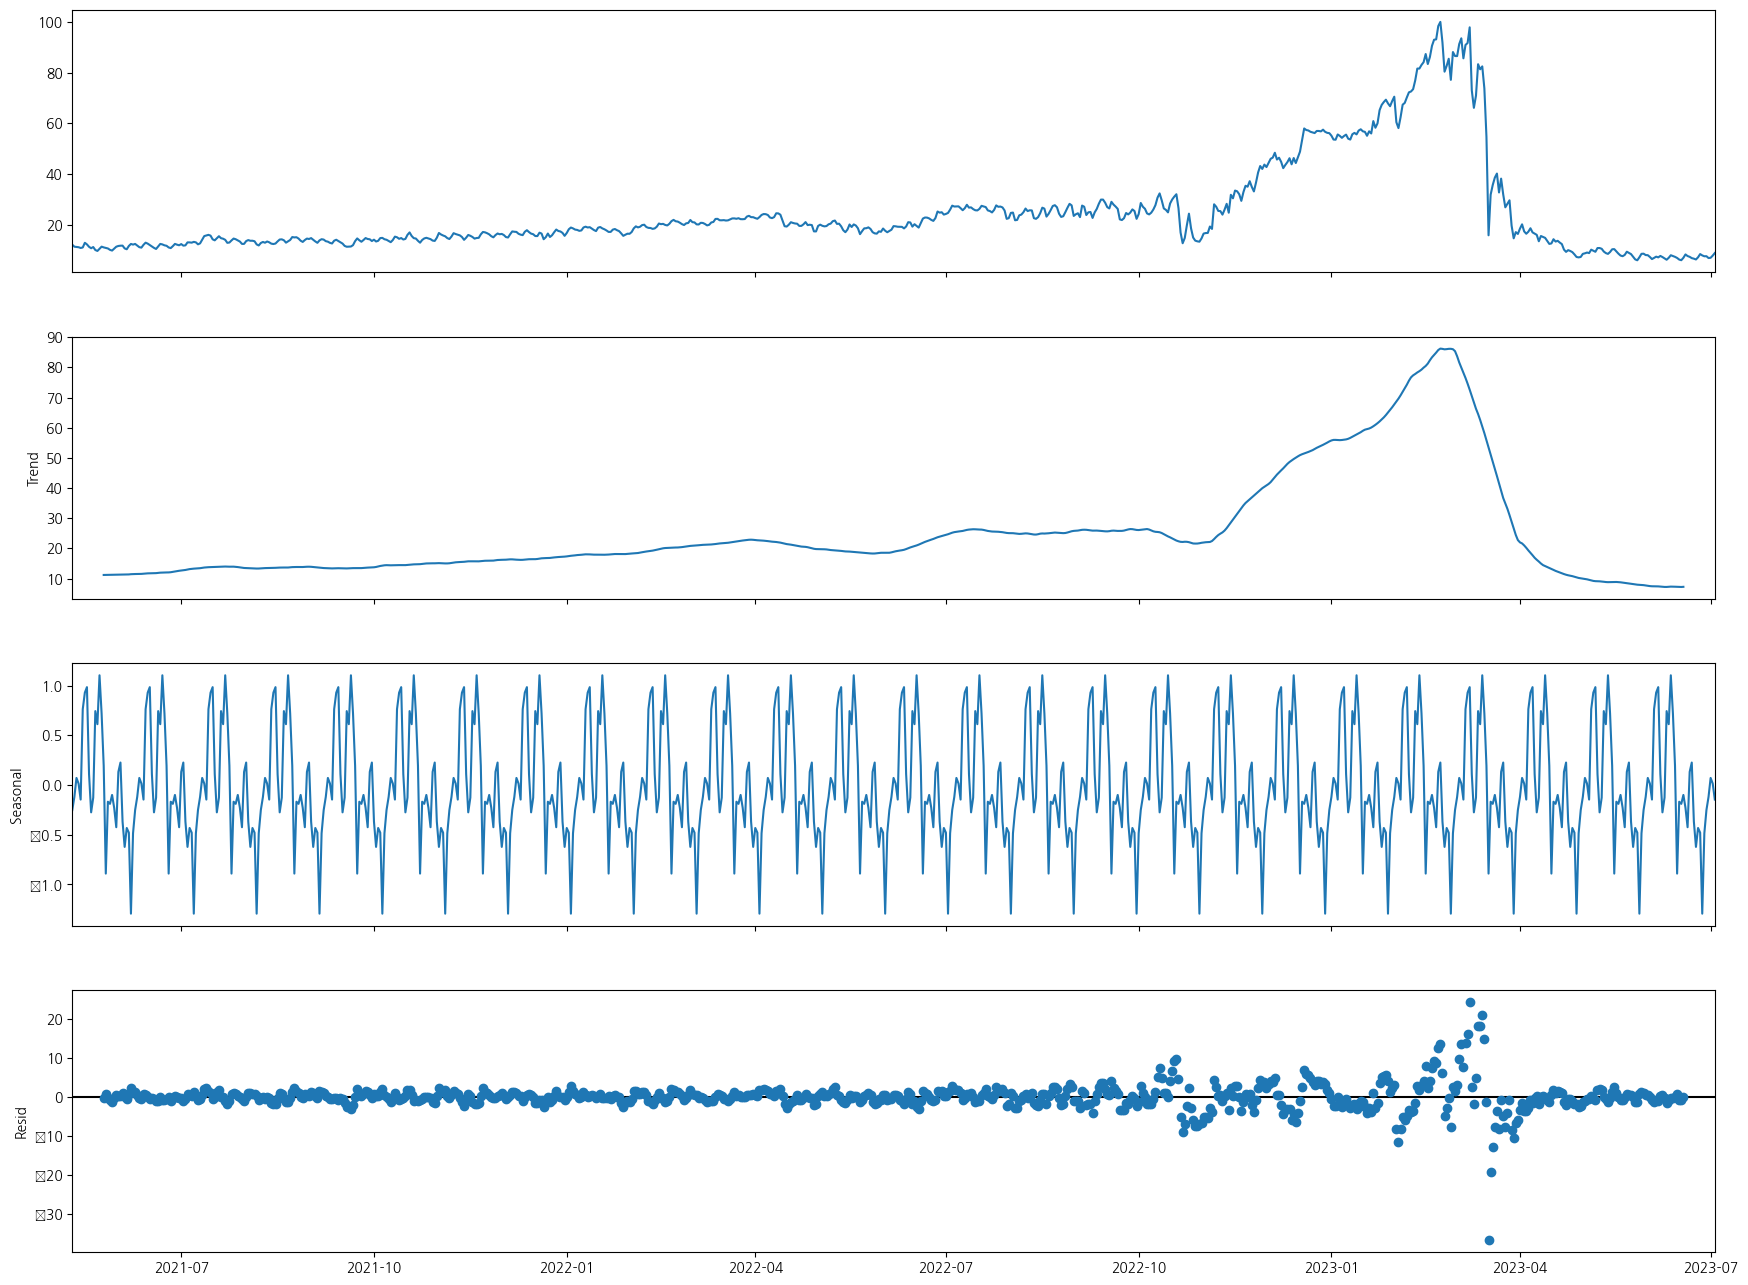

In [10]:
# 디지털/가전 항목의 분해
# 일별 데이터이므로 데이터의 주기를 30 또는 31로 설정
# 주별 -> 7, 분기별 -> 4, 월별 -> 12
result1 = seasonal_decompose(ts1, model = 'additive', period=30)
fig = plt.figure()
fig = result1.plot()
fig.set_size_inches(20, 14)

In [11]:
# 생활/건강 항목의 시계열 데이터 프레임 생성
# ts_df1 = pd.pivot_table(data = df, index = 'period', values = '생활/건강').reset_index()
# ts_df1.set_index('period')
timeSeries2 = df.loc[:, ['period', '생활/건강']]
timeSeries2.index = timeSeries2.period
ts2 = timeSeries2.drop('period', axis = 1)

In [12]:
ts2

,생활/건강
period,
2021-05-10,13.94238
2021-05-11,13.29577
2021-05-12,12.95931
2021-05-13,12.32444
2021-05-14,11.44237
...,...
2023-06-29,10.81814
2023-06-30,9.42761
2023-07-01,8.84696


D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


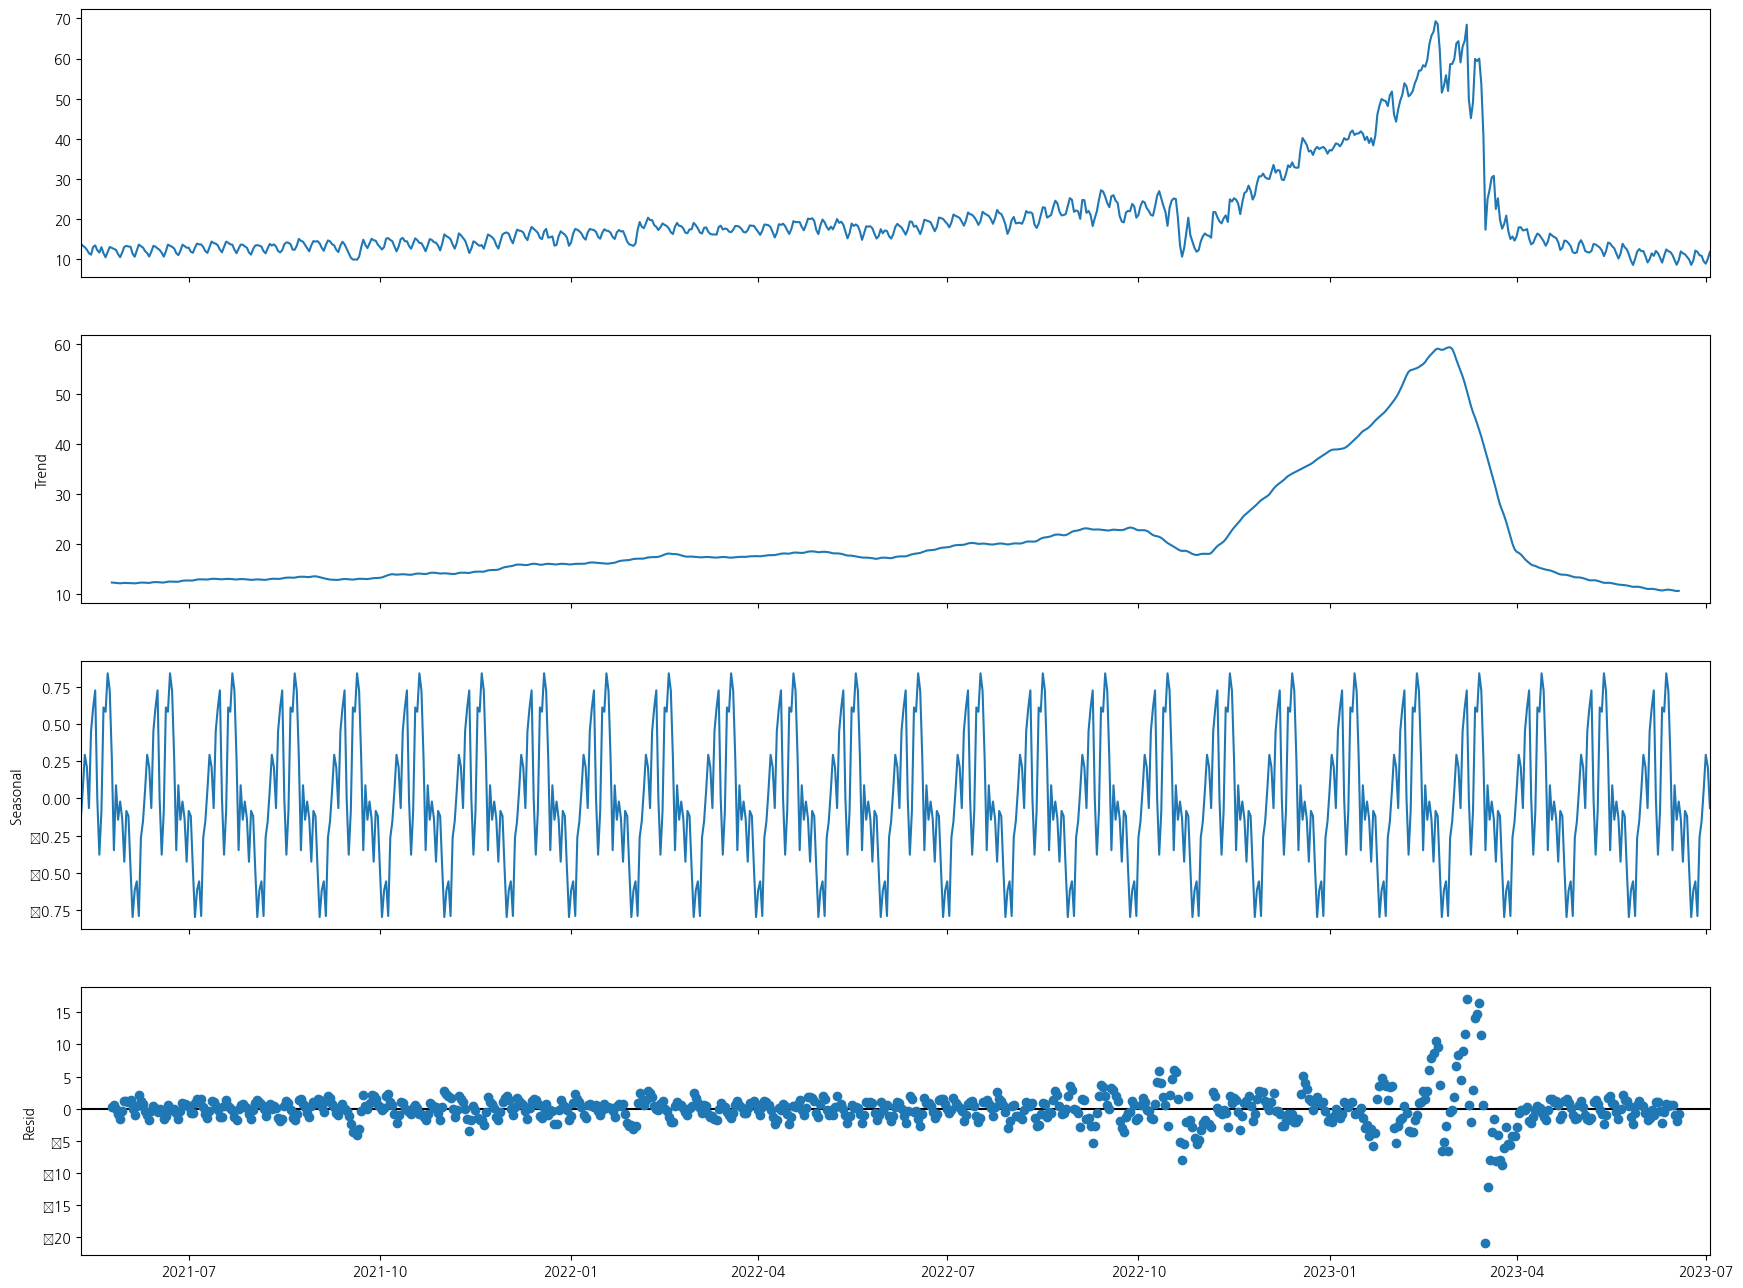

In [13]:
# 생활/건강 항목의 분해
result2 = seasonal_decompose(ts2, model = 'additive', period=30)
fig = plt.figure()
fig = result2.plot()
fig.set_size_inches(20, 14)

## ACF, PACF 그래프

* 데이터의 패턴이 보여, 정상성 확인을 위해 자기상관함수와 부분자기상관함수 그래프 확인

### 자기상관함수
* 어떤 무작위의 신호가 두 시각에 취하는 값의 상관관계를 나타내는 함수

### 부분자기상관함수
* ACF와 측정방식은 동일, t와 t+k 사이에 다른 값들의 영향력을 배제하고 측정하는 것

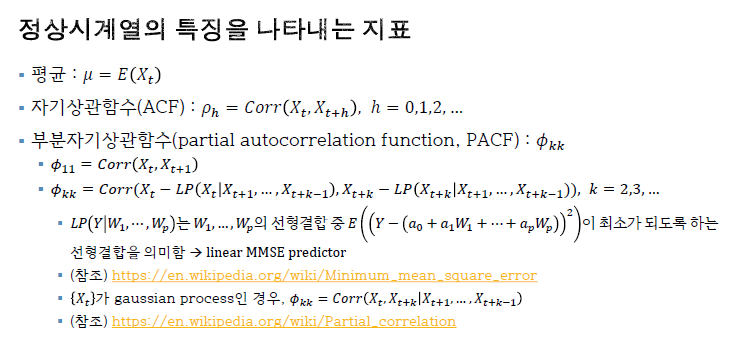

### 디지털/가전의 자기상관함수(ACF), 부분자기상관함수(PACF)

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


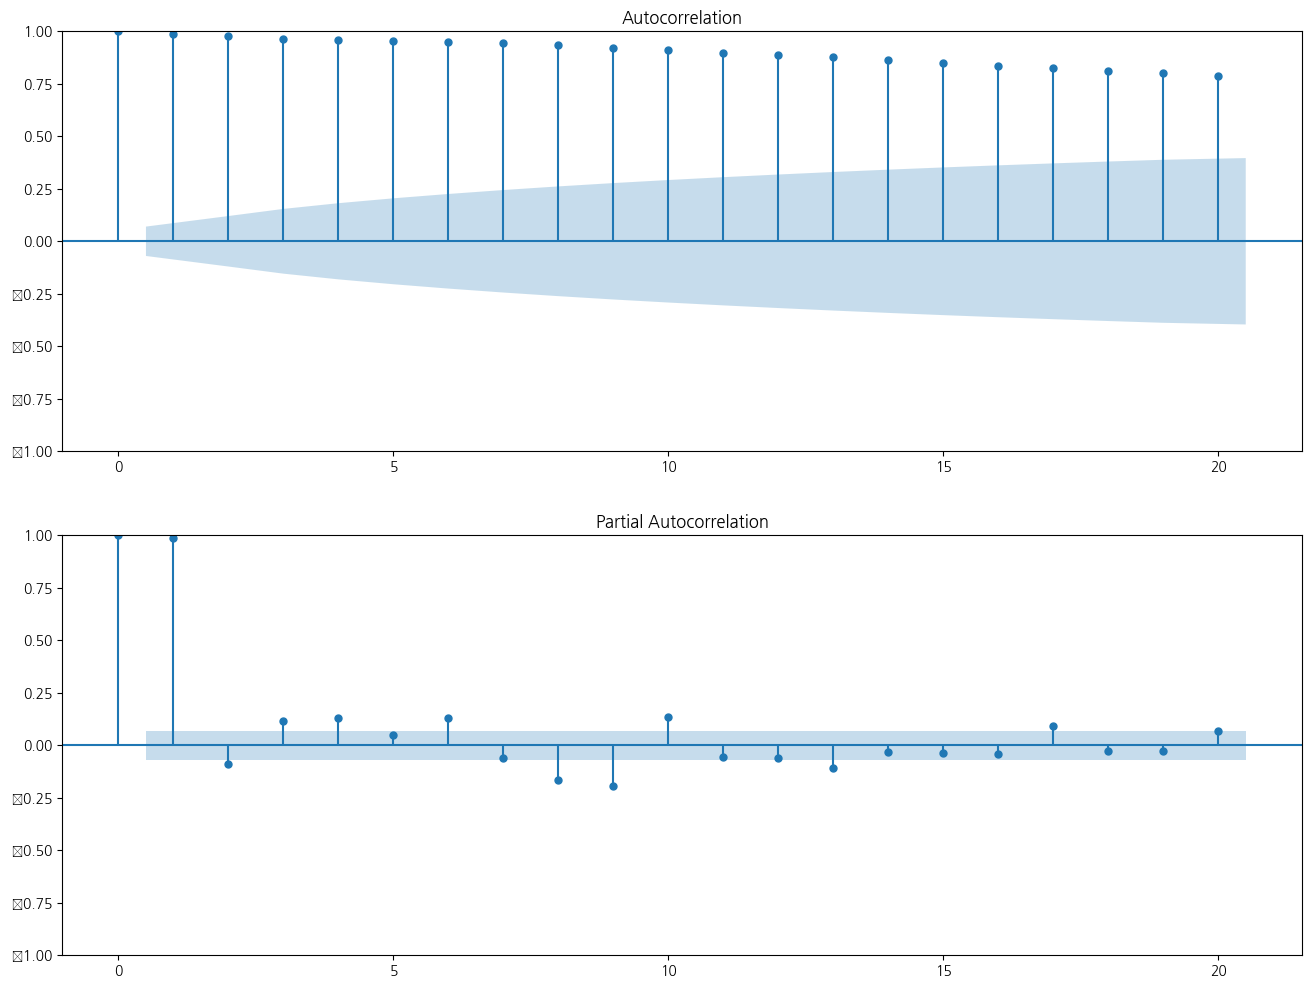

In [14]:
fig = plt.figure(figsize=(16, 12))

# ACF 그래프
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts1, lags=20, ax=ax1)

# PACF 그래프
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts1, lags=20, ax=ax2)

plt.show()

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


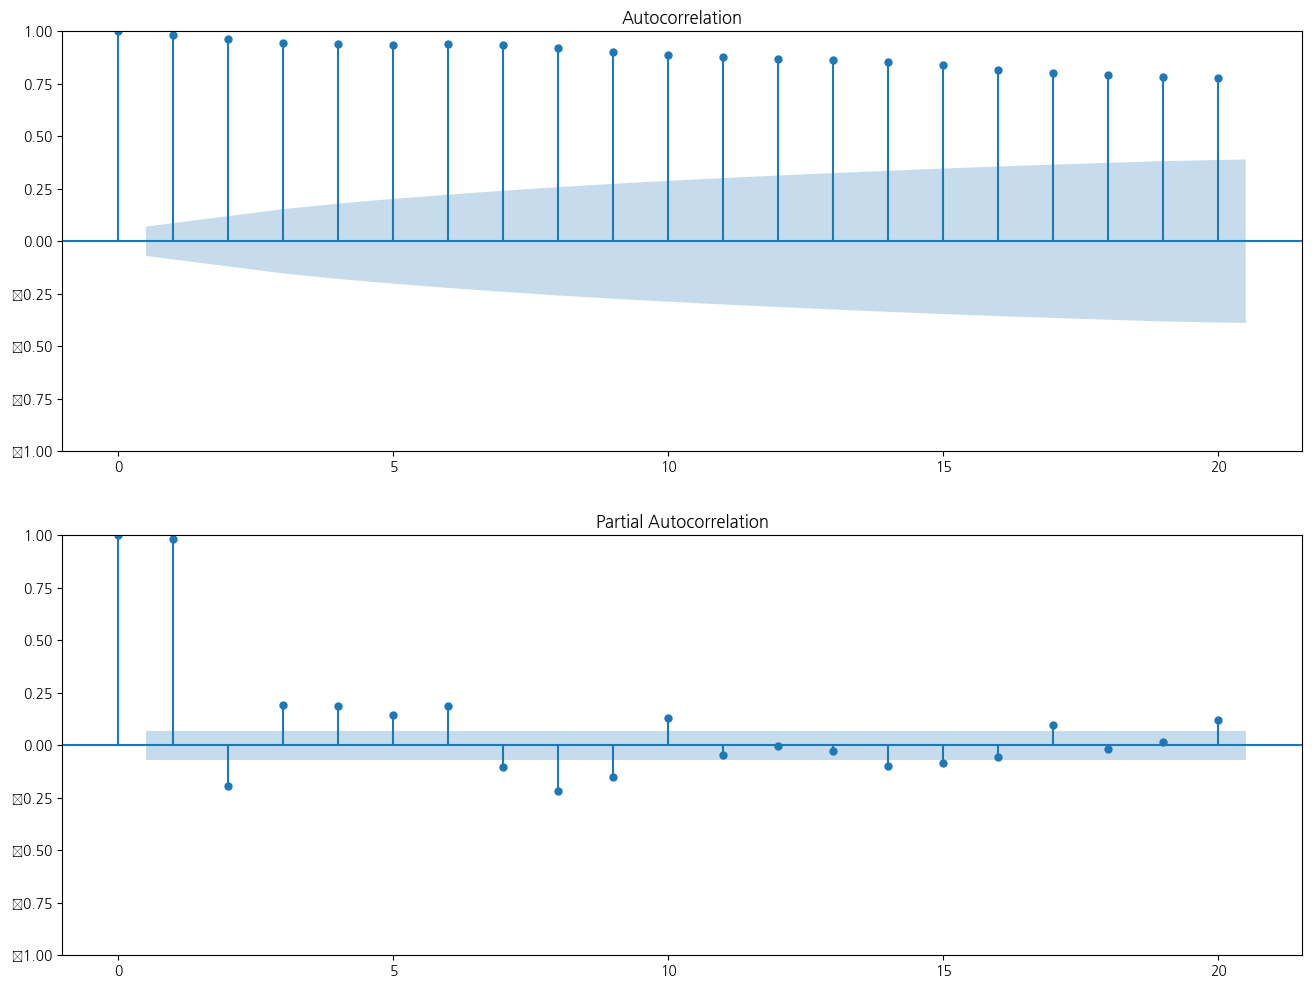

In [15]:
# 생활/건강 ACF
fig = plt.figure(figsize=(16, 12))

# ACF 그래프
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts2, lags=20, ax=ax1)

# PACF 그래프
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts2, lags=20, ax=ax2)

plt.show()

* 두 경우 모두 ACF그래프를 보면 천천히 감소하는 것으로 보아 비정상 시계열(정상성 만족x)임을 확인할 수 있음
* 정상시계열의 경우 보다 빠른 시차 내에 0으로 수렴함

## 단위근 검정

* 가설검정: h0: 정상성 만족x vs h1: 정상성 만족

In [16]:
# 디지털/가전
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.711796
p-value: 0.072019
Critical Values: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [17]:
# 생활/건강
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.522195
p-value: 0.110167
Critical Values: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


* 두 경우 모두 p-value값이 유의수준 0.05보다 훨씬 크므로, 귀무가설을 기각하지 못한다. 즉, 정상성을 만족하지 못하는 비정상 시계열임

## 모델 적용

* 차분: 비정상 시계열데이터를 정상성을 띄도록 계산하는 방법

### ARIMA

* auto_arima 메서드를 사용하여 최적의 파라미터를 갖는 모델 탐색
* auto-arima는 직접 iteration을 돌리면서 최적의 파라미터값을 찾는 경우와 결과에 있어서 조금은 차이가 있다고 예상
* seasonal = False를 통해 계절성 고려x
* 다음의 SARIMA모델을 적용시에 seasonal = True 적용

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [19]:
# 디지털/가전
# order(p, d, q): p = AR 자기회귀의 차수, d: 차분의 차수, q: 이동평균의 차수
# m = : 일별이면 m = 1, 월별이면 m = 12, 주별이면 m = 52
model1 = pm.auto_arima(ts1, seasonal = False, m=1, trace = True)
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3706.132, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3763.141, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3759.711, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3758.146, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3761.143, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3740.977, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3733.566, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3723.872, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3708.132, Time=0.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3758.484, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3733.371, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3730.224, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3710.019, Time=1.48 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3704.134, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]          

* 최적의 모델은 ARIMA(2, 1, 2)모형
* 잔차 분석: 적합모델인지 여부 판단

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


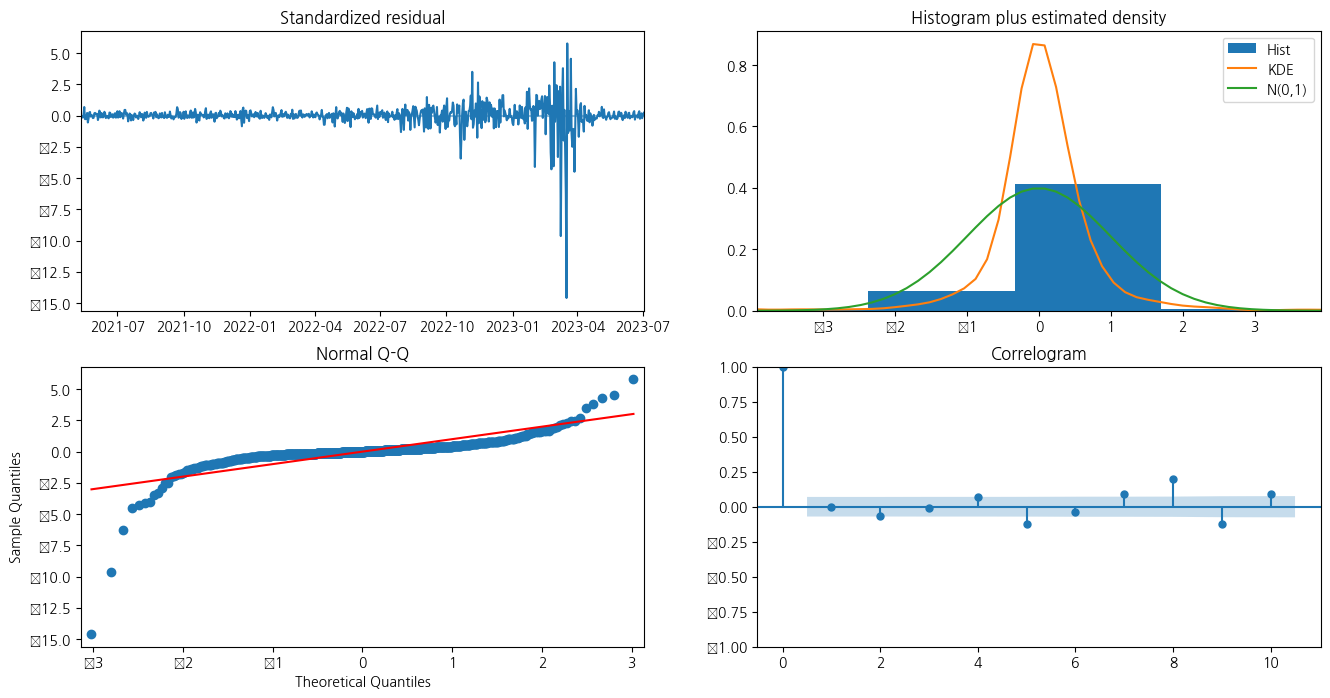

In [20]:
# 잔차 검정
model1.plot_diagnostics(figsize = (16, 8))
plt.show()

In [21]:
# 생활/건강
model2 = pm.auto_arima(ts2, seasonal = False, m=1, trace = True)
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3141.183, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3318.405, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3293.768, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3283.066, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3316.406, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3245.218, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3216.794, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3188.435, Time=1.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3142.022, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3283.308, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3228.006, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3209.181, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3141.050, Time=1.19 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3145.853, Time=1.59 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


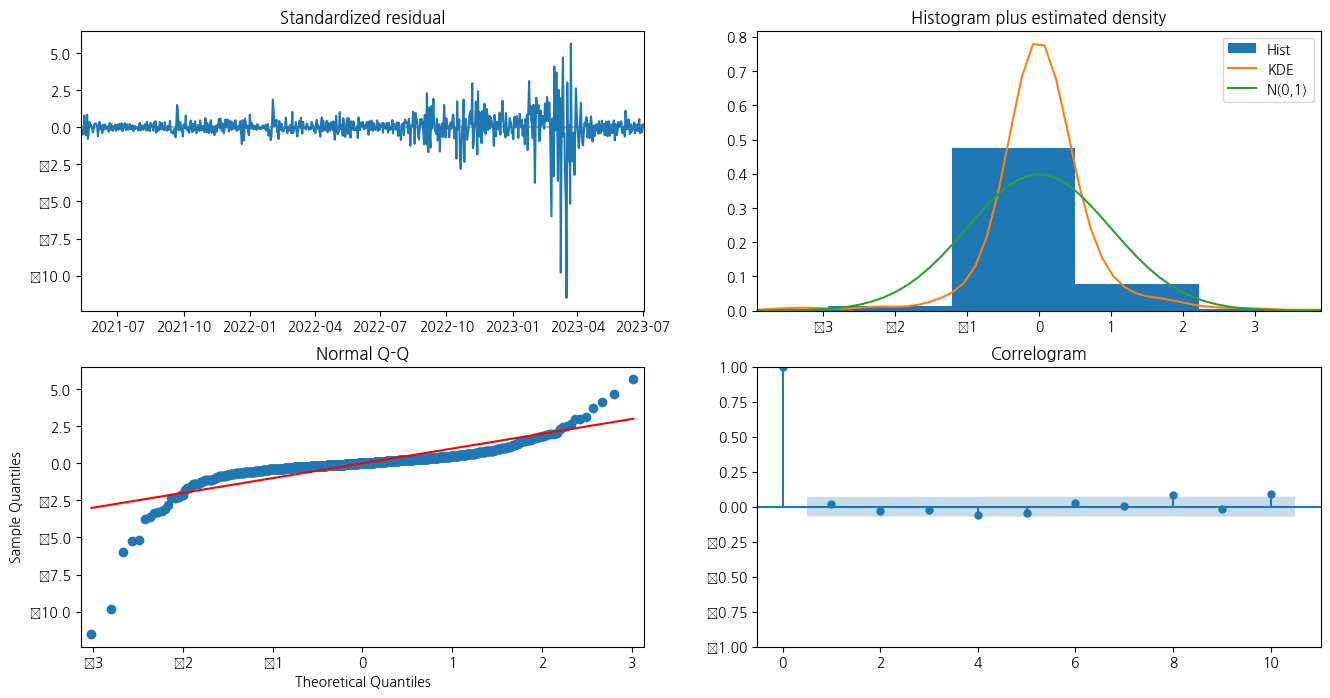

In [22]:
# 잔차 검정
model2.plot_diagnostics(figsize = (16, 8))
plt.show()

### 모델 예측

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


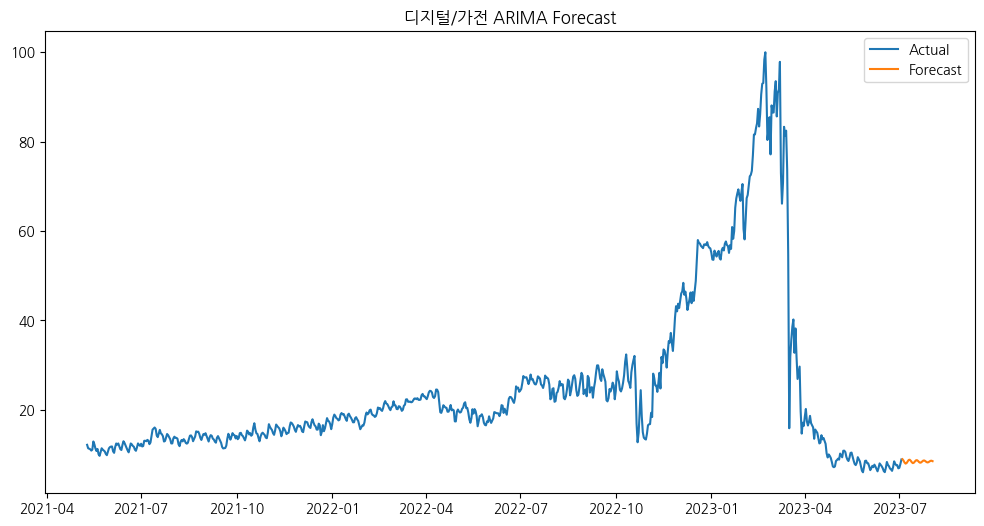

In [23]:
# 디지털/가전
# fit_model
import statsmodels.api as sm

# ARIMA 모델 적합
model1 = sm.tsa.SARIMAX(ts1, order=(2, 1, 2))

# 예측값 생성
model1_fit = model1.fit()

# 예측 시각화 그래프 생성
fcast1 = model1_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(ts1, label='Actual')  # 실제 시계열 데이터
plt.plot(fcast1, label='Forecast')  # 예측값
plt.title('디지털/가전 ARIMA Forecast')
plt.legend()
plt.show()

In [24]:
print(fcast1.head())
print(model1_fit.summary())

2023-07-04    8.970140
2023-07-05    8.658517
2023-07-06    8.218148
2023-07-07    7.977766
2023-07-08    8.096861
Freq: D, Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 디지털/가전   No. Observations:                  785
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1847.067
Date:                Tue, 04 Jul 2023   AIC                           3704.134
Time:                        16:53:32   BIC                           3727.457
Sample:                    05-10-2021   HQIC                          3713.102
                         - 07-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2013      0.021     57.028      

In [25]:
# MSE 도출
mse = model1_fit.mse
print("MSE:", mse)

MSE: 6.691638078673145


D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


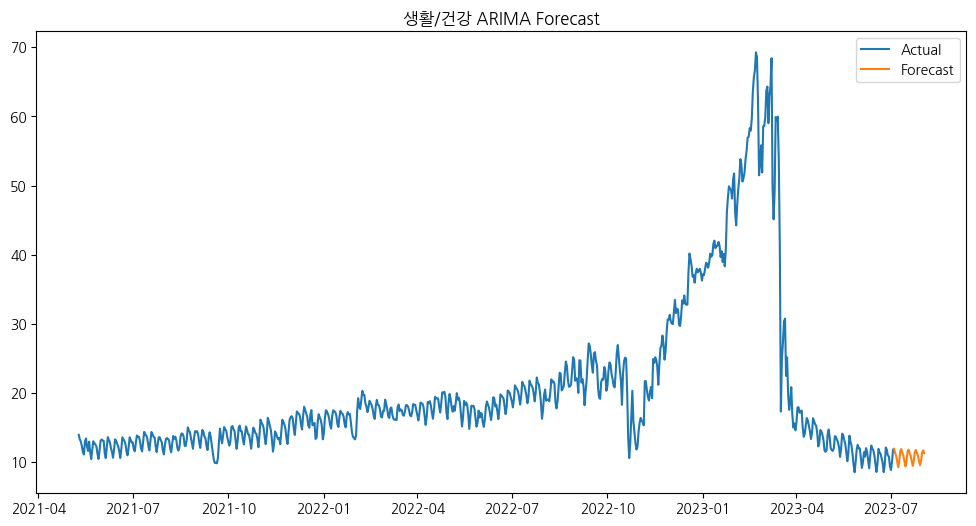

In [26]:
# 생활/건강
# ARIMA 모델 적합
model2 = sm.tsa.SARIMAX(ts2, order=(5, 1, 5))

# 예측값 생성
model2_fit = model2.fit()

# 예측 시각화 그래프 생성
fcast2 = model2_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(ts2, label='Actual')  # 실제 시계열 데이터
plt.plot(fcast2, label='Forecast')  # 예측값
plt.title('생활/건강 ARIMA Forecast')
plt.legend()
plt.show()

In [27]:
print(fcast2.head())
print(model2_fit.summary())

2023-07-04    11.917306
2023-07-05    11.304421
2023-07-06    10.899453
2023-07-07    10.073794
2023-07-08     9.252587
Freq: D, Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  생활/건강   No. Observations:                  785
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -1533.061
Date:                Tue, 04 Jul 2023   AIC                           3088.122
Time:                        16:53:34   BIC                           3139.431
Sample:                    05-10-2021   HQIC                          3107.852
                         - 07-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1293      0.069     -1.876 

In [28]:
# MSE 도출
mse = model2_fit.mse
print("MSE:", mse)

MSE: 3.159861501803632


### SARIMA
* ARIMA모델에 계절성까지 고려한 모델

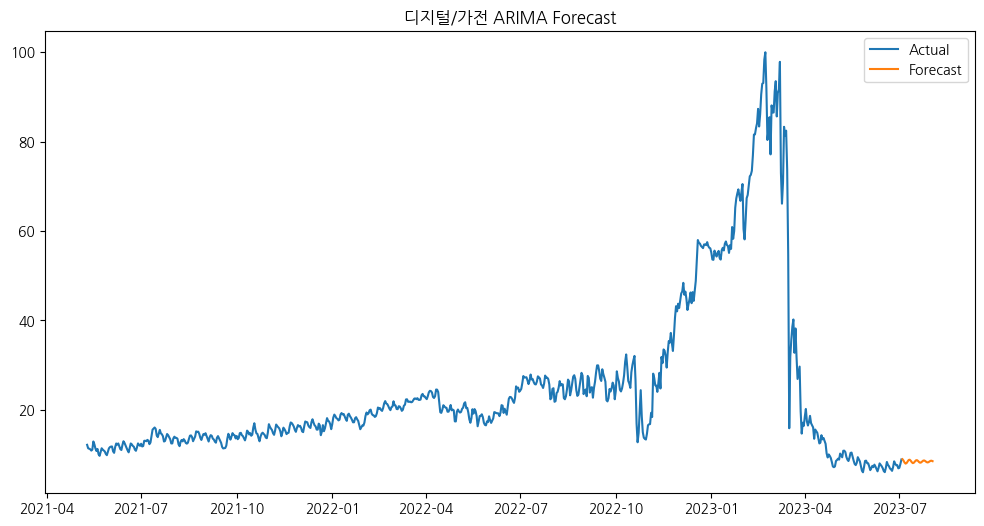

In [29]:
# 디지털/가전
from pmdarima.arima import auto_arima
# SARIMA 모델 파라미터 자동 설정
model3 = auto_arima(ts1, seasonal=True, m=1)

# 훈련
model3.fit(ts1)

# 예측
forecast1 = model3.predict(n_periods = 30)

# 예측 그래프
plt.figure(figsize=(12, 6))
plt.plot(ts1, label='Actual')  # 실제 시계열 데이터
plt.plot(forecast1, label='Forecast')  # 예측값
plt.title('디지털/가전 ARIMA Forecast')
plt.legend()
plt.show()

In [30]:
print(forecast1.head())
print(model3.summary())

2023-07-04    8.970140
2023-07-05    8.658517
2023-07-06    8.218148
2023-07-07    7.977766
2023-07-08    8.096861
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  785
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1847.067
Date:                Tue, 04 Jul 2023   AIC                           3704.134
Time:                        16:53:44   BIC                           3727.457
Sample:                    05-10-2021   HQIC                          3713.102
                         - 07-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2013      0.021     57.028      0.000       1.160     

In [31]:
# 실제값과 예측값 비교 및 MSE 계산
# n = forcast에서 n_preiods에 넣은 값
n = 30
actual_values = ts1[-n:]  # 예측 대상의 실제값
mse = mean_squared_error(actual_values, forecast1)
print("MSE:", mse)

MSE: 1.8992845521452297


D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


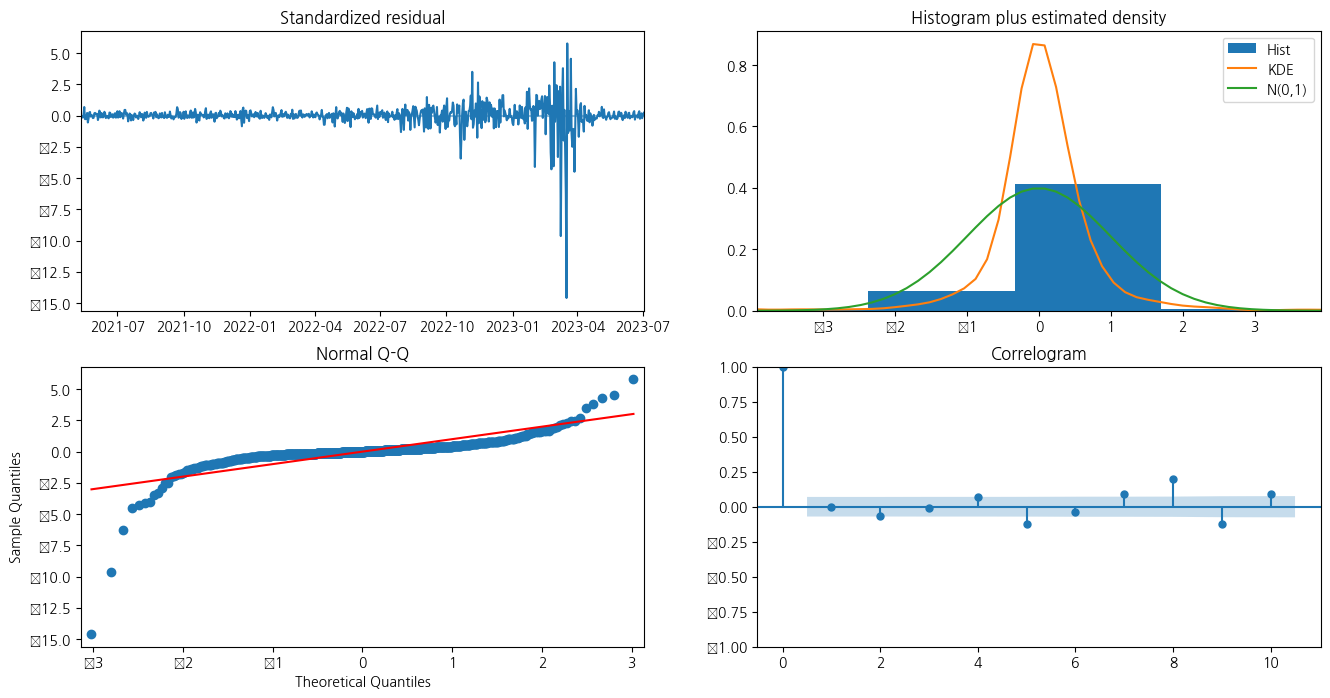

In [32]:
# 잔차검정
model3.plot_diagnostics(figsize = (16, 8))
plt.show()

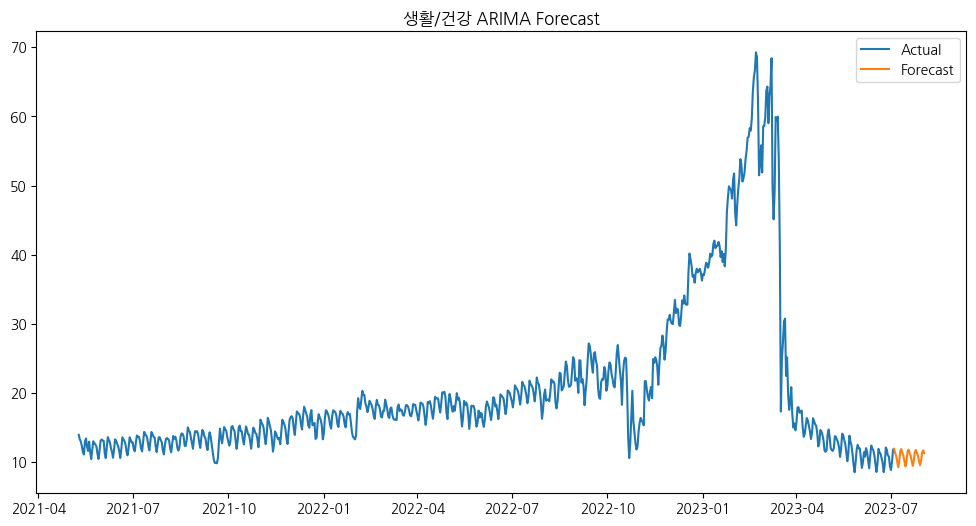

In [33]:
# 생활/건강
from pmdarima.arima import auto_arima
# SARIMA 모델 파라미터 자동 설정
model4 = auto_arima(ts2, seasonal=True, m=1)

# 훈련
model4.fit(ts2)

# 예측
forecast2 = model4.predict(n_periods = 30)

# 예측 그래프
plt.figure(figsize=(12, 6))
plt.plot(ts2, label='Actual')  # 실제 시계열 데이터
plt.plot(forecast2, label='Forecast')  # 예측값
plt.title('생활/건강 ARIMA Forecast')
plt.legend()
plt.show()

In [34]:
# 실제값과 예측값 비교 및 MSE 계산
n = 30
actual_values = ts2[-n:]  # 예측 대상의 실제값
mse = mean_squared_error(actual_values, forecast2)
print("MSE:", mse)

MSE: 2.372595158200284


D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


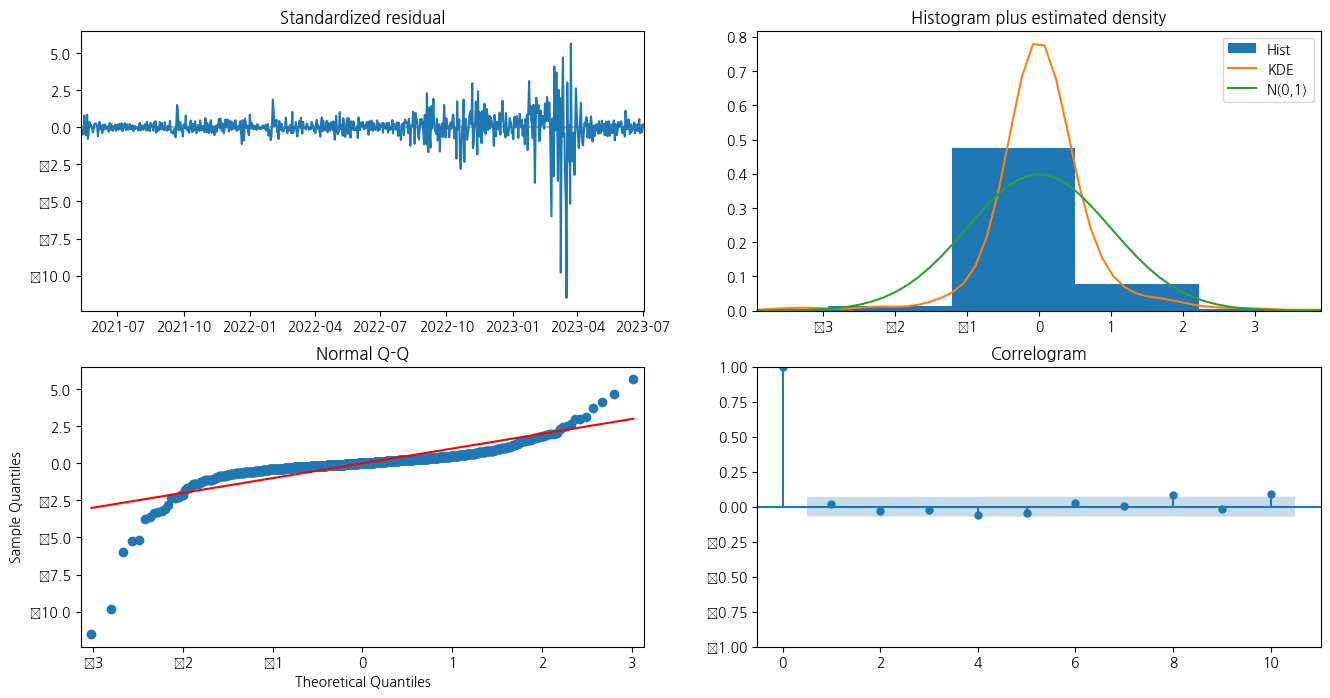

In [35]:
# 잔차검정
model4.plot_diagnostics(figsize = (16, 8))
plt.show()

## 결론

* 아직 더 세부적으로 확인해야할 부분이 많음(잔차분석, 예측시에 train/test데이터 분할 여부, 예측그래프의 시각화 범주 설정 등)
* ARIMA와 SARIMA모델 중에서는 mse가 근소하게 작은 SARIMA모델이 적합할 것으로 예상